# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../starter_code/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 0

In [4]:
base = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query = f"{base}appid={weather_api_key}&q={city}&units={units}"

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        wind_speed_list.append(response["wind"]["speed"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
             
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError) as e:
        print("City not found. Skipping...")

Processing Record 1 of Set 0 : praia da vitoria
Processing Record 2 of Set 0 : svetlogorsk
Processing Record 3 of Set 0 : qaqortoq
Processing Record 4 of Set 0 : mataura
Processing Record 5 of Set 0 : umzimvubu
Processing Record 6 of Set 0 : sobolevo
Processing Record 7 of Set 0 : cape town
Processing Record 8 of Set 0 : bandar-e lengeh
Processing Record 9 of Set 0 : nome
Processing Record 10 of Set 0 : ushumun
Processing Record 11 of Set 0 : busselton
Processing Record 12 of Set 0 : saint-philippe
Processing Record 13 of Set 0 : college
Processing Record 14 of Set 0 : char bhadrasan
Processing Record 15 of Set 0 : thompson
Processing Record 16 of Set 0 : jamestown
Processing Record 17 of Set 0 : antofagasta
Processing Record 18 of Set 0 : saint george
Processing Record 19 of Set 0 : taolanaro
Processing Record 20 of Set 0 : balabac
Processing Record 21 of Set 0 : bluff
Processing Record 22 of Set 0 : gasa
Processing Record 23 of Set 0 : mar del plata
Processing Record 24 of Set 0 : am

Processing Record 46 of Set 3 : belyy yar
Processing Record 47 of Set 3 : tabas
Processing Record 48 of Set 3 : vaitupu
Processing Record 49 of Set 3 : barrow
Processing Record 50 of Set 3 : yar-sale
Processing Record 0 of Set 4 : norrtalje
Processing Record 1 of Set 4 : luderitz
Processing Record 2 of Set 4 : aasiaat
Processing Record 3 of Set 4 : preobrazheniye
Processing Record 4 of Set 4 : huaraz
Processing Record 5 of Set 4 : cayenne
Processing Record 6 of Set 4 : marsh harbour
Processing Record 7 of Set 4 : asyut
Processing Record 8 of Set 4 : balakhninskiy
Processing Record 9 of Set 4 : saint-georges
Processing Record 10 of Set 4 : belmonte
Processing Record 11 of Set 4 : geraldton
Processing Record 12 of Set 4 : ouallam
Processing Record 13 of Set 4 : aklavik
Processing Record 14 of Set 4 : neiafu
Processing Record 15 of Set 4 : kaitangata
Processing Record 16 of Set 4 : poum
Processing Record 17 of Set 4 : hirara
Processing Record 18 of Set 4 : san patricio
Processing Record 1

Processing Record 43 of Set 7 : itarema
Processing Record 44 of Set 7 : half moon bay
Processing Record 45 of Set 7 : lexington
Processing Record 46 of Set 7 : san
Processing Record 47 of Set 7 : kavieng
Processing Record 48 of Set 7 : kizilskoye
Processing Record 49 of Set 7 : tamandare
Processing Record 50 of Set 7 : kortkeros
Processing Record 0 of Set 8 : taltal
Processing Record 1 of Set 8 : maryville
Processing Record 2 of Set 8 : chiguayante
Processing Record 3 of Set 8 : ovalle
Processing Record 4 of Set 8 : cocula
Processing Record 5 of Set 8 : burhaniye
Processing Record 6 of Set 8 : okhotsk
Processing Record 7 of Set 8 : sertania
Processing Record 8 of Set 8 : kutum
Processing Record 9 of Set 8 : skjervoy
Processing Record 10 of Set 8 : millington
Processing Record 11 of Set 8 : teknaf
Processing Record 12 of Set 8 : san carlos del zulia
Processing Record 13 of Set 8 : ladario
Processing Record 14 of Set 8 : abnub
Processing Record 15 of Set 8 : meulaboh
Processing Record 16

Processing Record 36 of Set 11 : broken hill
Processing Record 37 of Set 11 : watsa
Processing Record 38 of Set 11 : kilindoni
Processing Record 39 of Set 11 : guican
Processing Record 40 of Set 11 : atar
Processing Record 41 of Set 11 : bira
Processing Record 42 of Set 11 : bandrele
Processing Record 43 of Set 11 : sao felix do xingu
Processing Record 44 of Set 11 : port lincoln
Processing Record 45 of Set 11 : maniitsoq
Processing Record 46 of Set 11 : lolua
Processing Record 47 of Set 11 : marcona
Processing Record 48 of Set 11 : lazaro cardenas
Processing Record 49 of Set 11 : santa eulalia del rio
Processing Record 50 of Set 11 : hami
Processing Record 0 of Set 12 : tessalit
Processing Record 1 of Set 12 : prince rupert


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
output_data_file
output_data_file = pd.read_csv("../starter_code/cities.csv")
output_data_file.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [23]:
output_data_file.describe()
output_data_file.to_csv("Output/city_weather.csv", index=False, header=True)


FileNotFoundError: [Errno 2] No such file or directory: 'Output/city_weather.csv'

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

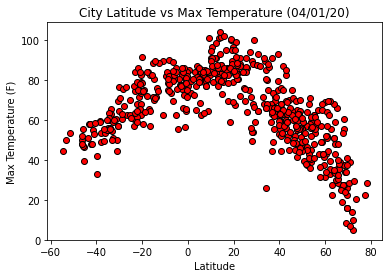

In [9]:
x_axis = output_data_file[["Lat"]]
y_axis = output_data_file[["Max Temp"]]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

As we get further from the equator (latitude of 0 degrees), temperature decreases. There are some outliers such as at around 37 degrees in latitude that has about max temp of 30. Research could be done to look into that.

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

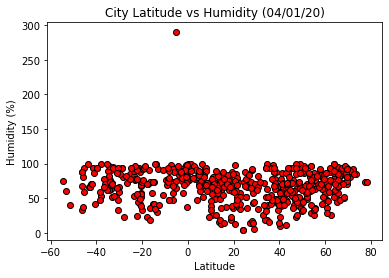

In [10]:
x_axis = output_data_file[["Lat"]]
y_axis = output_data_file[["Humidity"]]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

Northern (higher) latitudes tend to have higher humidity. In the southern hemisphere it tends to be less humid. There's one strong outlier around the equator that is very humid.

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

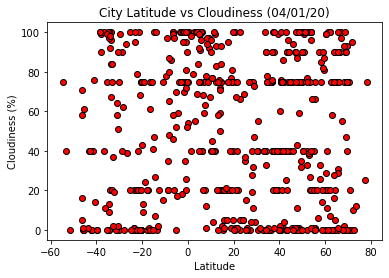

In [11]:
x_axis = output_data_file[["Lat"]]
y_axis = output_data_file[["Cloudiness"]]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

There doesn't seem to be an obvoius pattern to latitude and cloudiness. It does look like right at the equator there tends to be more cloudy weather than not.

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

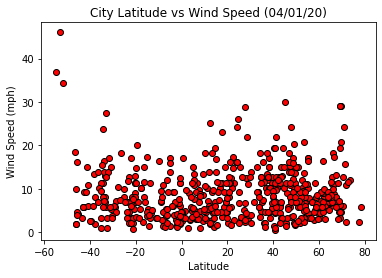

In [12]:
x_axis = output_data_file[["Lat"]]
y_axis = output_data_file[["Wind Speed"]]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

It's windy everywhere! Some outliers across the globe. Looks like northern parts (higher latitude) tends to have more occurances of wind, although not necessarily higher wind speed.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Max Temperature (F)')

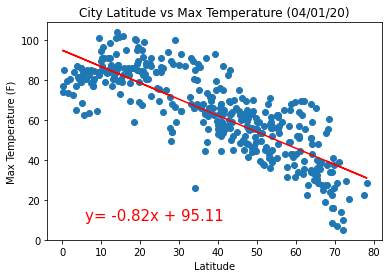

In [13]:
x_axis = output_data_file[output_data_file['Lat'] > 0]['Lat']
y_axis = output_data_file[output_data_file['Lat'] > 0]['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = slope * x_axis + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("City Latitude vs Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Max Temperature (F)')

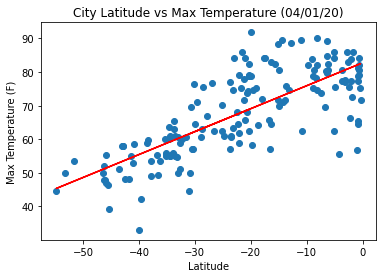

In [14]:
x_axis = output_data_file[output_data_file['Lat'] < 0]['Lat']
y_axis = output_data_file[output_data_file['Lat'] < 0]['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = slope * x_axis + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("City Latitude vs Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

As we get further from the equator, temperature goes up or down. More north or more south is colder. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Humidity')

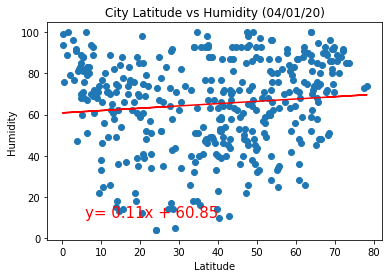

In [15]:
x_axis = output_data_file[output_data_file['Lat'] > 0]['Lat']
y_axis = output_data_file[output_data_file['Lat'] > 0]['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = slope * x_axis + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("City Latitude vs Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Humidity')

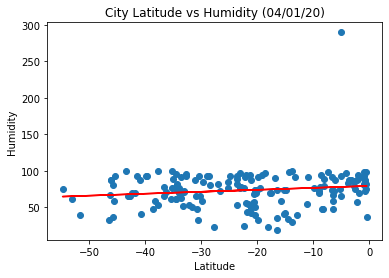

In [16]:
x_axis = output_data_file[output_data_file['Lat'] < 0]['Lat']
y_axis = output_data_file[output_data_file['Lat'] < 0]['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = slope * x_axis + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("City Latitude vs Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

The northern hemisphere has great variablity in humidity. Southern hemisphere is fairly consistent on humidity at or below 100, except for 1 outlier near the equator. South of the equator, humidity slighty trends down further from the equator, and north of the equator humidty slight trends up the further north.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Cloudiness (%)')

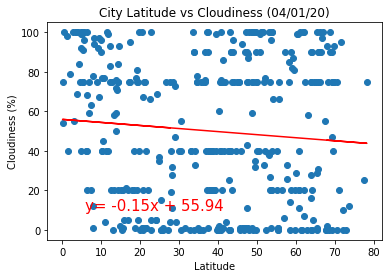

In [17]:
x_axis = output_data_file[output_data_file['Lat'] > 0]['Lat']
y_axis = output_data_file[output_data_file['Lat'] > 0]['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = slope * x_axis + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("City Latitude vs Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Cloudiness (%)')

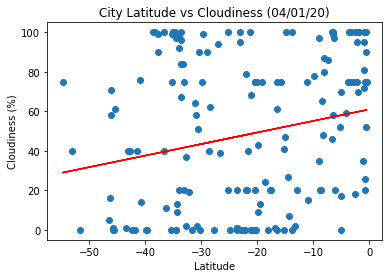

In [18]:
x_axis = output_data_file[output_data_file['Lat'] < 0]['Lat']
y_axis = output_data_file[output_data_file['Lat'] < 0]['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = slope * x_axis + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("City Latitude vs Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

South of the equator, Cloudiness slighty trends down further from the equator, and north of the equator Cloudiness slight trends down the further north. Both north and south hemisphere sees extreme outliers that see 0% or 100% cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Wind Speed (mph)')

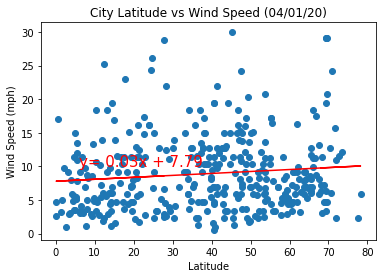

In [19]:
x_axis = output_data_file[output_data_file['Lat'] > 0]['Lat']
y_axis = output_data_file[output_data_file['Lat'] > 0]['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = slope * x_axis + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("City Latitude vs Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Wind Speed (mph)')

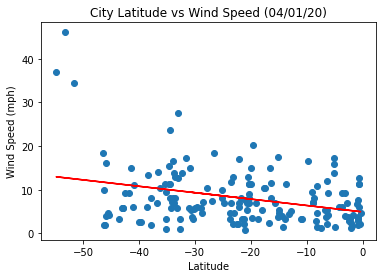

In [20]:
x_axis = output_data_file[output_data_file['Lat'] < 0]['Lat']
y_axis = output_data_file[output_data_file['Lat'] < 0]['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = slope * x_axis + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("City Latitude vs Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

In the southern hemisphere it is windier closer to the equator. In the north there is more variability in wind speed and how wind speed is more spread out across the globe rather than clustered in sections. Wind speed does go up slightly the further north.